# Intro to Machine Learning (feat. Tensorflow)

2017.4.13
Dongwoo 화목회

## Definition

Machine learning is the subfield of computer science that gives computers the ability to learn without being explicitly programmed.

## Supervised vs Unsupervised ( vs reinforcement )
- supervised
    - Regression problem
    - Classification problem
- unsupervised
    - Clustering
- reinforecement

## Tensorflow
Tensorflow is an open-source software library for Machine Intelligence. It was developed by Google to meet their needs for systems capable of building and training neural networks.

## Before Start..

### Hypothesis
H(x) = Wx + b에서 Wx + b는 x에 대한 1차 방적식으로 직선을 표현한다. 기울기에 해당하는 W(Weight)와 절편에 해당하는 b(bias)가 반복되는 과정에서 계속 바뀌고, 마지막 루프에서 바뀐 최종 값을 사용해서 데이터 예측(prediction)에 사용하게 된다. 최종 결과로 나온 가설을 모델(model)이라고 부르고, "학습되었다"라고 한다.
![title](hypothesis.png)

### Cost function
앞에서 설명한 Hypothesis 방정식에 대한 비용(cost)으로 방정식의 결과가 크게 나오면 좋지 않다고 얘기하고, 루프를 돌 때마다 W와 b를 비용이 적게 발생하는 방향으로 수정하게 된다.
![title](cost_function.png)

### Goal : Minimize cost
목표는 cost를 최소로 만드는 W(기울기)와 b(절편)를 찾는 것

## Linear Regression
2차원 좌표에 분포된 데이터를 1차원 직선 방정식을 통해 표현되지 않은 데이터를 예측하기 위한 분석 모델

### Gradient descent algorithm

![title](linear1.png)

![title](linear2.png)

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

200 206.674 [-9.96474075] [ 35.17779541]
400 62.289 [-4.56849813] [ 19.31218338]
600 18.7731 [-1.60602582] [ 10.60215569]
800 5.65799 [ 0.02033605] [ 5.82045364]
1000 1.70525 [ 0.91318834] [ 3.19535875]
1200 0.513941 [ 1.40335345] [ 1.75421357]
1400 0.154896 [ 1.67244816] [ 0.9630428]
1600 0.0466837 [ 1.82017791] [ 0.52869904]
1800 0.0140699 [ 1.90127993] [ 0.2902492]
2000 0.0042405 [ 1.94580364] [ 0.15934351]


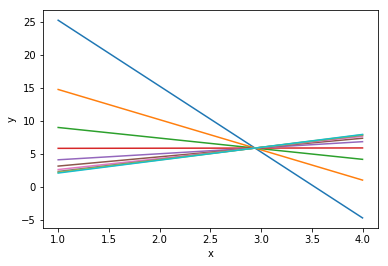

In [7]:
x_data = [1., 2., 3., 4.]
y_data = [2., 4., 6., 8.]

# range is -100 ~ 100
W = tf.Variable(tf.random_uniform([1], -100., 100.))
b = tf.Variable(tf.random_uniform([1], -100., 100.))

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = W * X + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

rate = tf.Variable(0.01)
optimizer = tf.train.GradientDescentOptimizer(rate)
train = optimizer.minimize(cost)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(2001):
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0 and step >= 200:
        print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W), sess.run(b))
        plt.plot(x_data,sess.run(W)*x_data + sess.run(b))

plt.ylabel('y')
plt.xlabel('x')
plt.show()

# print(sess.run(hypothesis, feed_dict={X: 5}))           # [ 10.]
# print(sess.run(hypothesis, feed_dict={X: 2.5}))         # [5.]



## Logistic Classification
Linear Regression을 활용해서 데이터를 분류하는 모델

### Sigmoid
sigmoid는 linear regression에서 가져온 값을 0과 1 사이의 값으로 변환한다. x가 0일 때, 0.5가 된다.

![title](sigmoid.png)

### New cost function
sigmoid 함수 적용으로 인해 새로운 cost function를 사용해야 한다.

![title](cost_function2.png)

### Gradient Decent Algorithm

![title](gradient.png)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import tensorflow as tf
import numpy as np

# 04train.txt
# #x0 x1 x2 y
# 1   2   1   0
# 1   3   2   0
# 1   3   5   0
# 1   5   5   1
# 1   7   5   1
# 1   2   5   1

# 원본 파일은 6행 4열이지만, 열 우선이라서 4행 6열로 가져옴
xy = np.loadtxt('04train.txt', unpack=True, dtype='float32')

# print(xy[0], xy[-1])        # [ 1.  1.  1.  1.  1.  1.] [ 0.  0.  0.  1.  1.  1.]

x_data = xy[:-1]            # 3행 6열
y_data = xy[-1]             # 1행 6열

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# feature별 가중치를 난수로 초기화. feature는 bias 포함해서 3개. 1행 3열.
W = tf.Variable(tf.random_uniform([1, len(x_data)], -1.0, 1.0))

# 행렬 곱셈. (1x3) * (3x6)
h = tf.matmul(W, X)
hypothesis = tf.div(1., 1. + tf.exp(-h))    # exp(-h) = e ** -h. e는 자연상수

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

rate = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(rate)
train = optimizer.minimize(cost)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(2001):
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
        print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

print('-----------------------------------------')

# 결과가 0 또는 1로 계산되는 것이 아니라 0과 1 사이의 값으로 나오기 때문에 True/False는 직접 판단
print('[1, 2, 1] :', sess.run(hypothesis, feed_dict={X: [[1], [2], [1]]}) > 0.5)
print('[1, 5, 5] :', sess.run(hypothesis, feed_dict={X: [[1], [5], [5]]}) > 0.5)
sess.close()



0 0.837924 [[ 0.67223454 -0.10460093  0.3180154 ]]
200 0.500997 [[-1.48802495  0.12843084  0.35273504]]
400 0.423672 [[-2.7033565   0.24845743  0.51990491]]
600 0.390119 [[-3.50705624  0.31958625  0.63729244]]
800 0.372174 [[-4.09583426  0.3660709   0.72739005]]
1000 0.361234 [[-4.55587435  0.39870661  0.80029243]]
1200 0.35396 [[-4.93113947  0.4228183   0.86139172]]
1400 0.348815 [[-5.24675035  0.44131786  0.91389936]]
1600 0.345007 [[-5.51830196  0.45593175  0.95987999]]
1800 0.342086 [[-5.75608969  0.46774739  1.0007385 ]]
2000 0.339783 [[-5.96724463  0.47748369  1.03747296]]
-----------------------------------------
[1, 2, 1] : [[False]]
[1, 5, 5] : [[ True]]


## Softmax Regression
Logistic Regression을 부르는 다른 이름은 binary classification이다. 데이터를 1과 0의 두 가지 그룹으로 나누기 위해 사용하는 모델이다. Softmax는 데이터를 2개 이상의 그룹으로 나누기 위해 binary classification을 확장한 모델이다.

![title](softmax1.png)

### Softmax
softmax는 점수로 나온 결과를 전체 합계가 1이 되는 0과 1 사이의 값으로 변경해 준다. 전체를 더하면 1이 되기 때문에 확률(probabilites)이라고 부르면 의미가 더욱 분명해진다

![title](softmax2.png)

### One-Hot Encoding
one-hot encoding은 softmax로 구한 값 중에서 가장 큰 값을 1로, 나머지를 0으로 만든다. 어떤 것을 선택할지를 확실하게 정리해 준다. one-hot encoding은 설명한 것처럼 매우 간단하기 때문에 직접 구현할 수도 있지만, 텐서플로우에서는 argmax 함수라는 이름으로 제공하고 있다.

![title](softmax3.png)

### Cross-Entropy Cost Function
S(Y)는 softmax가 예측한 값이고, L(Y)는 실제 Y의 값으로 L은 label을 의미한다. cost 함수는 예측한 값과 실제 값의 거리(distance, D)를 계산하는 함수로, 이 값이 줄어드는 방향으로, 즉 entropy가 감소하는 방향으로 진행하다 보면 최저점을 만나게 된다.

![title](softmax4.png)

![title](softmax5.png)

In [11]:
import tensorflow as tf
import numpy as np

In [91]:
# softmax이기 때문에 y를 표현할 때, 벡터로 표현한다.
# 1개의 값으로 표현한다고 할 때, 뭐라고 쓸지도 사실 애매하다.

# 05train.txt
# #x0 x1 x2 y[A   B   C]
# 1   2   1   0   0   1     # C
# 1   3   2   0   0   1
# 1   3   4   0   0   1
# 1   5   5   0   1   0     # B
# 1   7   5   0   1   0
# 1   2   5   0   1   0
# 1   6   6   1   0   0     # A
# 1   7   7   1   0   0

xy = np.loadtxt('05train.txt', unpack=True, dtype='float32')

# xy는 6x8. xy[:3]은 3x8. 행렬 곱셈을 하기 위해 미리 transpose.
x_data = np.transpose(xy[:3])
y_data = np.transpose(xy[3:])

# print('x_data :', x_data.shape)     # x_data : (8, 3)
# print('y_data :', y_data.shape)     # y_data : (8, 3)

X = tf.placeholder("float", [None, 3])  # x_data와 같은 크기의 열 가짐. 행 크기는 모름.
Y = tf.placeholder("float", [None, 3])  # tf.float32라고 써도 됨

W = tf.Variable(tf.zeros([3, 3]))       # 3x3 행렬. 전체 0.

# softmax 알고리즘 적용. X*W = (8x3) * (3x3) = (8x3)
hypothesis = tf.nn.softmax(tf.matmul(X, W))

# cross-entropy cost 함수
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), reduction_indices=1))

learning_rate = 0.1
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for step in range(3001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            feed = {X: x_data, Y: y_data}
            print('{:4} {:8.6}'.format(step, sess.run(cost, feed_dict=feed)), *sess.run(W))

    print('-------------------------------')

    # 1은 bias로 항상 1. (11, 7)은 x 입력
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7]]})
    print("a :", a, sess.run(tf.argmax(a, 1)))         

    b = sess.run(hypothesis, feed_dict={X: [[1, 5, 5]]})
    print("b :", b, sess.run(tf.argmax(b, 1)))         

    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0]]})
    print("c :", c, sess.run(tf.argmax(c, 1)))        


   0   1.0678 [-0.00833333  0.00416667  0.00416666] [ 0.01666667  0.02916667 -0.04583334] [ 0.01666666  0.04166667 -0.05833334]
 200 0.699681 [-1.5737735  -0.36410642  1.93788099] [ 0.0967759  -0.09235884 -0.00441682] [ 0.24915566  0.23823613 -0.48739177]
 400 0.594579 [-2.54309034 -0.43173078  2.97482228] [ 0.13064831 -0.04841127 -0.08223619] [ 0.40734777  0.22857714 -0.63592446]
 600 0.535829 [-3.31521416 -0.39115471  3.70637012] [ 0.13982886 -0.02464214 -0.11518568] [ 0.54843497  0.21297167 -0.76140594]
 800 0.494312 [-3.98393679 -0.31143472  4.29537106] [ 0.1417881  -0.00935038 -0.13243635] [ 0.6748786   0.1950776  -0.86995488]
1000 0.461916 [-4.58334923 -0.21852757  4.8018775 ] [ 0.14145668  0.00154199 -0.14299677] [ 0.78935486  0.17700934 -0.9663626 ]
1200 0.435343 [-5.13021469 -0.12343737  5.25365353] [ 0.14044461  0.00979479 -0.15023731] [ 0.89399701  0.15975396 -1.05374885]
1400 0.412891 [-5.63466215 -0.03106253  5.66572714] [ 0.1393245   0.01630212 -0.15562418] [ 0.99044132  

## Deep Learning

### Human's Brain
사람의 뇌와 비슷하게 동작하도록 구성. 일정 크기 이하라면 활성화(activation)되지 않도록 구성

![title](deep2.png)

![title](deep3.png)

### XOR problem

![title](xor.png)

In [12]:
import tensorflow as tf
import numpy as np

### Does Not Work..

In [13]:
# 07train.txt
# # x1 x2 y
# 0   0   0
# 0   1   1
# 1   0   1
# 1   1   0

xy = np.loadtxt('07train.txt', unpack=True)

x_data = xy[:-1]
y_data = xy[-1]

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_uniform([1, len(x_data)], -1.0, 1.0))

h = tf.matmul(W, X)
hypothesis = tf.div(1., 1. + tf.exp(-h))

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

rate = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(rate)
train = optimizer.minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for step in range(1000):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))
    print('-'*50)

    # Test model
    correct_prediction = tf.equal(tf.floor(hypothesis+0.5), Y)

    #Calculate accuraty
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
    param = [hypothesis, tf.floor(hypothesis+0.5), correct_prediction, accuracy]
    result = sess.run(param, feed_dict={X:x_data, Y:y_data})

    for i in result:
        print(i)
    print('Accuracy :', accuracy.eval({X:x_data, Y:y_data}))

0 0.745717 [[ 0.86157721  0.12977192]]
200 0.693876 [[ 0.11783948 -0.09426147]]
400 0.693205 [[ 0.03054625 -0.03001043]]
600 0.693152 [[ 0.00864731 -0.00863515]]
800 0.693148 [[ 0.00246622 -0.00246592]]
--------------------------------------------------
[[ 0.5         0.49982291  0.50017709  0.5       ]]
[[ 1.  0.  1.  1.]]
[[False False  True False]]
0.25
Accuracy : 0.25


### NN for XOR

In [14]:
xy = np.loadtxt('07train.txt', unpack=True)

x_data = np.transpose(xy[:-1])
y_data = np.reshape(xy[-1], (4, 1))

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_uniform([2, 2], -1.0, 1.0))
W2 = tf.Variable(tf.random_uniform([2, 1], -1.0, 1.0))

b1 = tf.Variable(tf.zeros([2]))
b2 = tf.Variable(tf.zeros([1]))

L2 = tf.sigmoid(tf.matmul(X, W1) + b1)
hypothesis = tf.sigmoid(tf.matmul(L2, W2) + b2)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

rate = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(rate)
train = optimizer.minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for step in range(10000):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 2000 == 999:
            # b1과 b2는 출력 생략. 한 줄에 출력하기 위해 reshape 사용
            r1, (r2, r3) = sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2])
            print('{:5} {:10.8f} {} {}'.format(step+1, r1, np.reshape(r2, (1,4)), np.reshape(r3, (1,2))))
    print('-'*50)

    # Test model
    correct_prediction = tf.equal(tf.floor(hypothesis+0.5), Y)

    #Calculate accuraty
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
    param = [hypothesis, tf.floor(hypothesis+0.5), correct_prediction, accuracy]
    result = sess.run(param, feed_dict={X:x_data, Y:y_data})

    print(*result[0])
    print(*result[1])
    print(*result[2])
    print( result[-1])
    print('Accuracy :', accuracy.eval({X:x_data, Y:y_data}))

 1000 0.69318557 [[ 0.00879412  0.76684374 -0.30098861 -0.71702021]] [[ 0.65671682  0.14016879]]
 3000 0.69141364 [[ 0.00748227  0.74723804 -0.16658312 -0.98316383]] [[ 0.57826585  0.40016973]]
 5000 0.59383595 [[-0.4357602   2.54660511  0.37541351 -3.01620698]] [[ 0.65475595  2.58294272]]
 7000 0.10400865 [[-4.22204494  5.10216236  3.87335396 -5.27188015]] [[ 5.89516592  6.19796276]]
 9000 0.03573160 [[-5.28727436  5.78857756  4.96164322 -5.93484592]] [[ 8.04621792  8.01526165]]
--------------------------------------------------
[ 0.03074165] [ 0.97514027] [ 0.97754288] [ 0.02631707]
[ 0.] [ 1.] [ 1.] [ 0.]
[ True] [ True] [ True] [ True]
1.0
Accuracy : 1.0


### MNIST

#### Softmax

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 0.548379772
Epoch: 0002 cost= 0.366397427
Epoch: 0003 cost= 0.336682462
Epoch: 0004 cost= 0.321336086
Epoch: 0005 cost= 0.311170549
Epoch: 0006 cost= 0.304181358
Epoch: 0007 cost= 0.298735990
Epoch: 0008 cost= 0.294510695
Epoch: 0009 cost= 0.290705519
Epoch: 0010 cost= 0.287806567
Epoch: 0011 cost= 0.285113236
Epoch: 0012 cost= 0.282674599
Epoch: 0013 cost= 0.280615871
Epoch: 0014 cost= 0.278847154
Epoch: 0015 cost= 0.277132416
Epoch: 0016 cost= 0.275719005
Epoch: 0017 cost= 0.274308553
Epoch: 0018 cost= 0.273082635
Epoch: 0019 cost= 0.271611717
Epoch: 0020 cost= 0.270619700
Epoch: 0021 cost= 0.269657017
Epoch: 0022 cost= 0.268757150
Epoch: 0023 cost= 0.267626746
Epoch: 0024 cost= 0.266804289
Epoch: 0025 cost= 0.266070729
Label :  [4]
Prediction : [4]


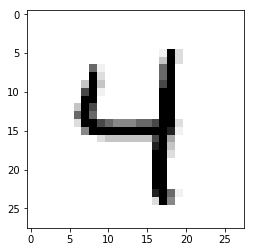

Optimization Finished!
Accuracy: 0.9237


In [17]:
import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Parameters.
learning_rate = 0.1
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10])  # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
hypothesis = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hypothesis), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        # 나누어 떨어지지 않으면, 뒤쪽 이미지 일부는 사용하지 않는다.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs, y: batch_ys})

            # 분할해서 구동하기 때문에 cost를 계속해서 누적시킨다. 전체 중의 일부에 대한 비용.
            avg_cost += c / total_batch
        # Display logs per epoch step. display_step이 1이기 때문에 if는 필요없다.
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    # Label과 Prediction이 같은 값을 출력하면 맞는 것이다.
    import random
    r = random.randrange(mnist.test.num_examples)
    print('Label : ', sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print('Prediction :', sess.run(tf.argmax(hypothesis, 1), {x: mnist.test.images[r:r+1]}))

    # 1줄로 된 것을 28x28로 변환
    import matplotlib.pyplot as plt
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

#### Neural Network

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 0.194413211
Epoch: 0002 cost= 0.058463944
Epoch: 0003 cost= 0.039161217
Epoch: 0004 cost= 0.029039243
Epoch: 0005 cost= 0.022257142
Epoch: 0006 cost= 0.017475904
Epoch: 0007 cost= 0.013757427
Epoch: 0008 cost= 0.010988224
Epoch: 0009 cost= 0.008736229
Epoch: 0010 cost= 0.007020326
Epoch: 0011 cost= 0.005604672
Epoch: 0012 cost= 0.004423175
Epoch: 0013 cost= 0.003485011
Epoch: 0014 cost= 0.002778560
Epoch: 0015 cost= 0.002194124
Epoch: 0016 cost= 0.001659622
Epoch: 0017 cost= 0.001290463
Epoch: 0018 cost= 0.001008104
Epoch: 0019 cost= 0.000801290
Epoch: 0020 cost= 0.000634146
Epoch: 0021 cost= 0.000478845
Epoch: 0022 cost= 0.000358009
Epoch: 0023 cost= 0.000297571
Epoch: 0024 cost= 0.000242255
Epoch: 0025 cost= 0.000189631
Label :  [0]
Prediction : [0]


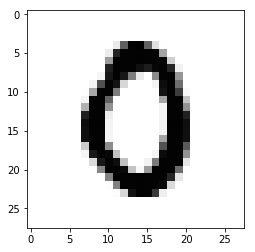

Optimization Finished!
Accuracy: 0.9497


In [8]:
import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Parameters. 반복문에서 사용하는데, 미리 만들어 놓았다.
learning_rate = 0.001
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
X = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
Y = tf.placeholder(tf.float32, [None, 10])  # 0-9 digits recognition => 10 classes

# Set model weights
W1 = tf.Variable(tf.random_normal([784, 256]))
W2 = tf.Variable(tf.random_normal([256, 256]))
W3 = tf.Variable(tf.random_normal([256,  10]))

B1 = tf.Variable(tf.random_normal([256]))
B2 = tf.Variable(tf.random_normal([256]))
B3 = tf.Variable(tf.random_normal([ 10]))

# Construct model
L1 = tf.sigmoid(tf.add(tf.matmul(X, W1), B1))
L2 = tf.sigmoid(tf.add(tf.matmul(L1, W2), B2))

# Construct model
hypothesis = tf.nn.softmax(tf.matmul(L2, W3) + B3) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_mean(Y*tf.log(hypothesis), reduction_indices=1))

# Gradient Descent
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        # 나누어 떨어지지 않으면, 뒤쪽 이미지 일부는 사용하지 않는다.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})

            # 분할해서 구동하기 때문에 cost를 계속해서 누적시킨다. 전체 중의 일부에 대한 비용.
            avg_cost += c / total_batch
        # Display logs per epoch step. display_step이 1이기 때문에 if는 필요없다.
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    # Label과 Prediction이 같은 값을 출력하면 맞는 것이다.
    import random
    r = random.randrange(mnist.test.num_examples)
    print('Label : ', sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print('Prediction :', sess.run(tf.argmax(hypothesis, 1), {X: mnist.test.images[r:r+1]}))

    # 1줄로 된 것을 28x28로 변환
    import matplotlib.pyplot as plt
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()
    
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))

## Next..

### Convolutional Neural Network

### Recurrent Neural Network